In [11]:
import biosonic
print(biosonic.__file__)

/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/__init__.py


In [12]:
import numpy as np
from scipy.signal import chirp, check_NOLA
from biosonic.plot import plot_filterbank_and_cepstrum, plot_spectrogram
from biosonic.filter import mel_filterbank
from biosonic.compute.spectrotemporal import cepstral_coefficients, spectrogram
from biosonic.handle import read_wav

In [13]:
n_filters = 20
n_fft = 512
n_ceps = 32

f1 = 300
f2 = 1400
duration = 1
sr = 16000
time = np.linspace(0, duration, int(sr * duration), endpoint=False)
x = chirp(time, f1, 1, f2, method='hyperbolic')# + np.random.normal(0, .5, size=time.shape)

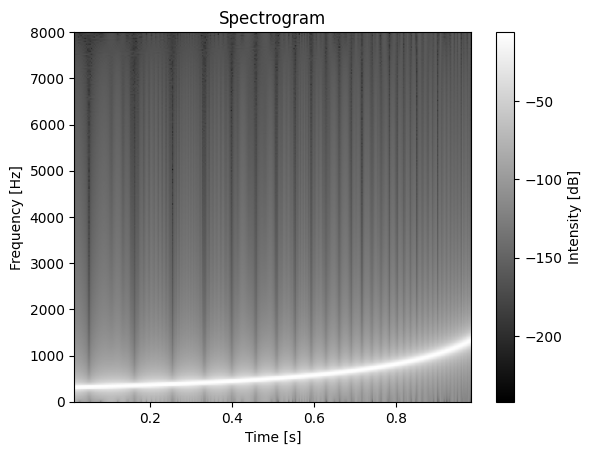

In [14]:
Sx, t, f = spectrogram(x, sr=sr, window='hann', window_length=512, overlap=0.9)
plot_spectrogram(x, sr, window='hann', window_length=512, overlap=.9, cmap='grey')

In [15]:
signal_ = read_wav("/Users/lenagies/Desktop/Master/Thesis/geese/data/GT00742_10_Boris_contact.wav")
print(signal_)

Signal(data=array([-0.00012207, -0.00094607, -0.001648  , ..., -0.00701926,
       -0.00747703, -0.00817896], shape=(5771,), dtype=float32), n_channels=1, sr=44100, quantization='float32')


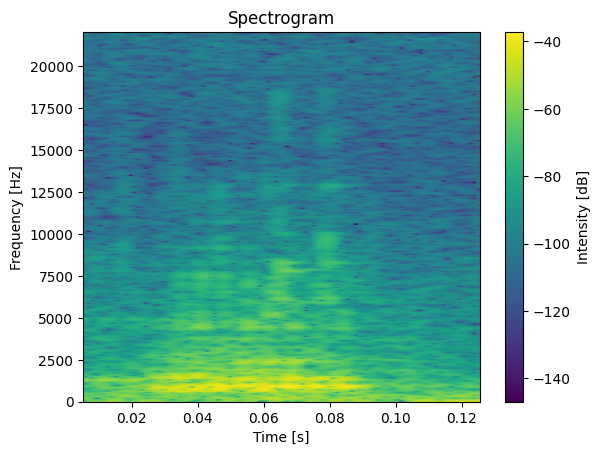

In [24]:
Sx, t, f = spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=512, overlap=0.95)
plot_spectrogram(signal_.data, signal_.sr, window='hann', window_length=512, overlap=.9, cmap='viridis')

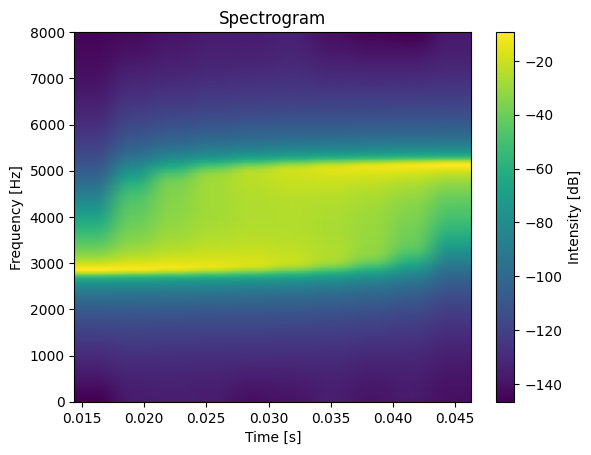

In [25]:
fbanks = mel_filterbank(n_filters, n_fft, signal_.sr)
Sx_mel = np.einsum("...ft,mf->...mt", Sx, fbanks, optimize=True)#np.dot(Sx.T, fbanks.T)
plot_spectrogram(x, sr, window='hann', window_length=512, overlap=.9, cmap='viridis')

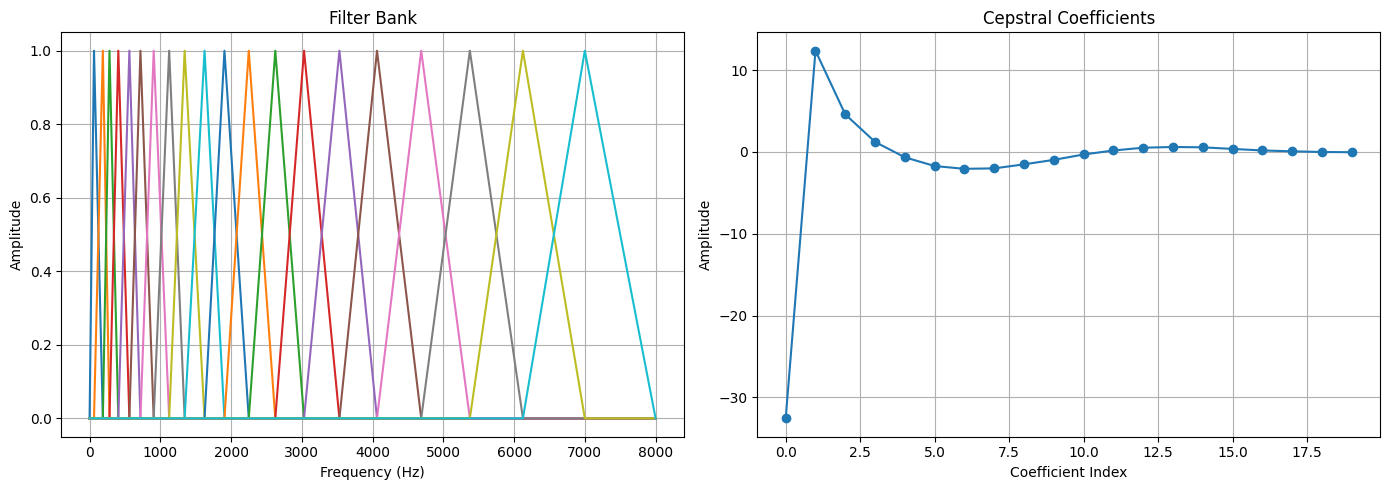

In [18]:
fbanks = mel_filterbank(n_filters, n_fft, sr)
ceps = cepstral_coefficients(x, sr, n_fft, n_filters, n_ceps)
plot_filterbank_and_cepstrum(
        fbanks, 
        sr, 
        n_fft, 
        ceps, 
        fmax=None, 
        title_prefix="")

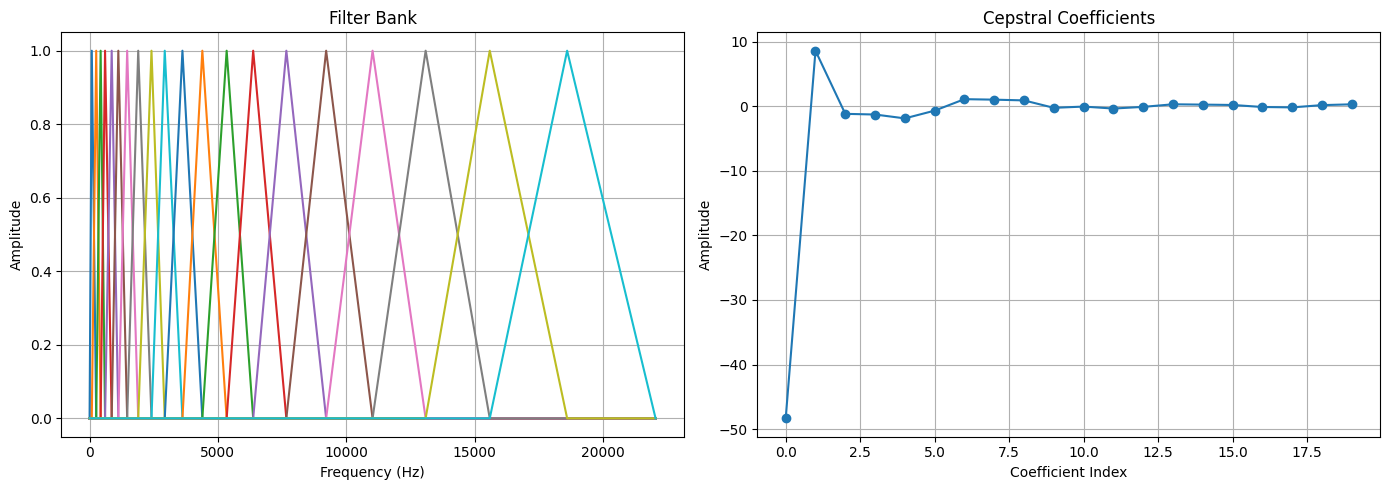

In [19]:
fbanks = mel_filterbank(n_filters, n_fft, signal_.sr)
ceps = cepstral_coefficients(signal_.data, signal_.sr, n_fft, n_filters, n_ceps)
plot_filterbank_and_cepstrum(
        fbanks, 
        signal_.sr, 
        n_fft, 
        ceps, 
        fmax=None, 
        title_prefix="")

In [20]:
sr = 16000
t = np.linspace(0, 1, sr, endpoint=False)
freq = 1000
x = np.sin(2 * np.pi * freq * t)

T_x, N = 1 / 20, 1000  # 20 Hz sampling rate for 50 s signal
t_x = np.arange(N) * T_x  # time indexes for signal
f_i = 1 * np.arctan((t_x - t_x[N // 2]) / 2) + 5  # varying frequency
x = np.sin(2*np.pi*np.cumsum(f_i)*T_x)

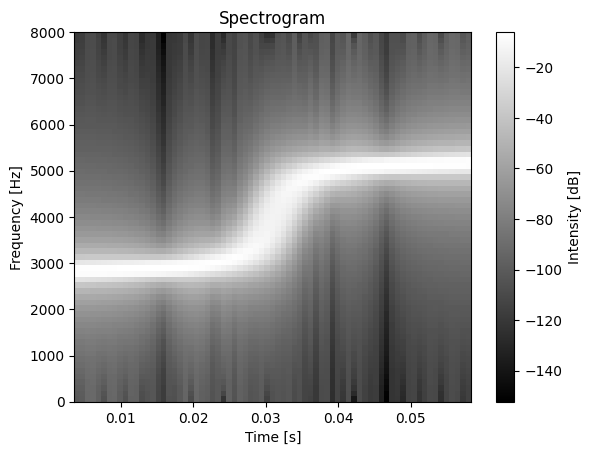

In [26]:
Sx, t, f = spectrogram(x, sr=20, window='hann', window_length=512, overlap=0.9)
plot_spectrogram(x, sr, window_length=128, overlap=.9, cmap='grey')

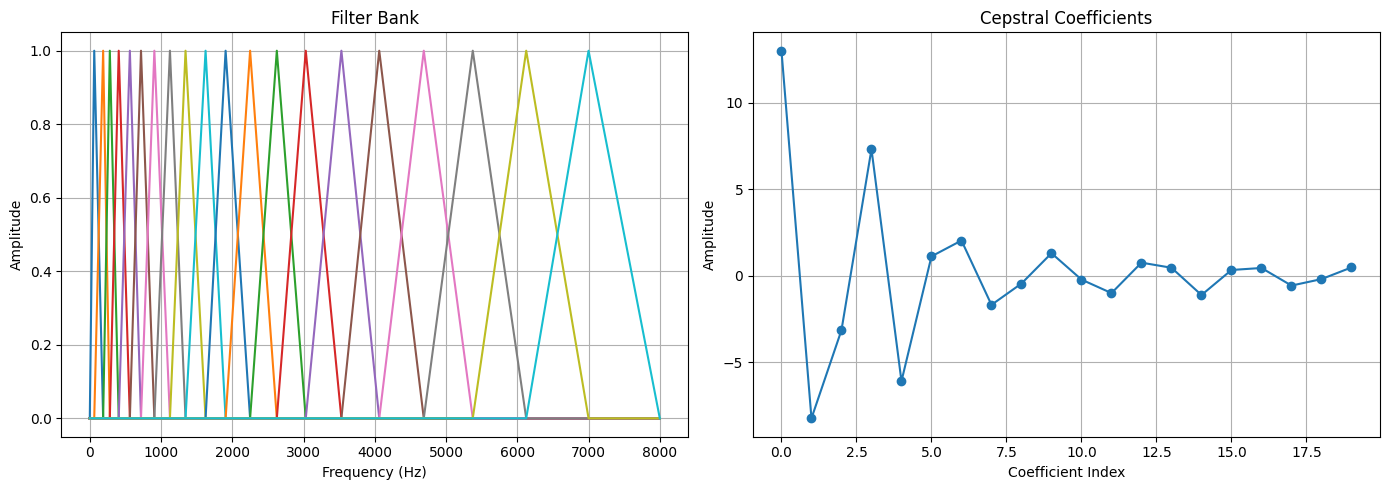

In [22]:
fbanks = mel_filterbank(n_filters, n_fft, sr)
ceps = cepstral_coefficients(x, sr, n_fft, n_filters, n_ceps)
plot_filterbank_and_cepstrum(
        fbanks, 
        sr, 
        n_fft, 
        ceps, 
        fmax=None, 
        title_prefix="")

In [27]:
fbanks = mel_filterbank(n_filters, n_fft, sr)
Sx_mel = np.einsum("...ft,mf->...mt", Sx, fbanks, optimize=True)#np.dot(Sx.T, fbanks.T)
Sx_mel.shape
# plot_spectrogram(Sx_mel, t, f, cmap='grey')

(20, 30)